In [1]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In this project I will be exploring 5 datasets
- dataset
    - training
    - stores
    - transactions
    - holiday
    - test
    - oil

In [2]:
holiday = pd.read_csv("../../../store-sales-time-series-forecasting/holidays_events.csv")
oil = pd.read_csv("../../../store-sales-time-series-forecasting/oil.csv")
trans = pd.read_csv("../../../store-sales-time-series-forecasting/transactions.csv")
stores = pd.read_csv("../../../store-sales-time-series-forecasting/stores.csv")


# training and test data
train = pd.read_csv("../../../store-sales-time-series-forecasting/train.csv")
test = pd.read_csv("../../../store-sales-time-series-forecasting/test.csv")

In [3]:
print(f'Number of holiday samples: {holiday.shape}')
print(f'Number of oil samples: {oil.shape}')
print(f'Number of transaction samples: {trans.shape}')
print(f'Number of stores samples: {stores.shape}')

print(f'Number of train samples: {train.shape}')
print(f'Number of test samples: {test.shape}')
print(train.info())
print(train.columns)
print(train.head())

Number of holiday samples: (350, 6)
Number of oil samples: (1218, 2)
Number of transaction samples: (83488, 3)
Number of stores samples: (54, 5)
Number of train samples: (3000888, 6)
Number of test samples: (28512, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None
Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')
   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4  

In [4]:
print("transaction header")
print(trans.head())

transaction header
         date  store_nbr  transactions
0  2013-01-01         25           770
1  2013-01-02          1          2111
2  2013-01-02          2          2358
3  2013-01-02          3          3487
4  2013-01-02          4          1922


In [5]:
print("stores header")
print(stores.head())

stores header
   store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4


In [6]:
print("oil header")
print(oil.head(10))

oil header
         date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20
5  2013-01-08       93.21
6  2013-01-09       93.08
7  2013-01-10       93.81
8  2013-01-11       93.60
9  2013-01-14       94.27


In [7]:
print("holiday header")
print(holiday.head())

holiday header
         date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False  


Some background about the data from Kaggle
- train.csv
    - The training data, comprising time series of features **store_nbr**, **family**, and **onpromotion** as well as the target sales.
    - **store_nbr** identifies the store at which the products are sold.
    - **family** identifies the type of product sold.
    - **sales** gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
    - **onpromotion** gives the total number of items in a product family that were being promoted at a store at a given date.
- test.csv
    - The test data, having the same features as the training data. You will predict the target **sales** for the dates in this file.
    - The dates in the test data are for the 15 days after the last date in the training data.
- stores.csv
    - Store metadata, including **city**, **state**, **type**, and **cluster**.
    - **cluster** is a grouping of similar stores.
- oil.csv
    - Daily oil price. Includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.)
- holidays_events.csv
    - Holidays and Events, with metadata
    - NOTE: Pay special attention to the **transferred** column. A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was actually celebrated, look for the corresponding row where type is Transfer. For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12. Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break across a long weekend). These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.
    - Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).
- Additional Notes
    - Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this.
    - A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.

One of the first things we learned about this data is that **Ecuador** is country that heavily dependent on oil and since oil is a huge factor in the economy, this will also impact the grocery store prices and lower transaction from people in Ecuador.

Text(0, 0.5, 'Crude Oil Price (Per Barrel)')

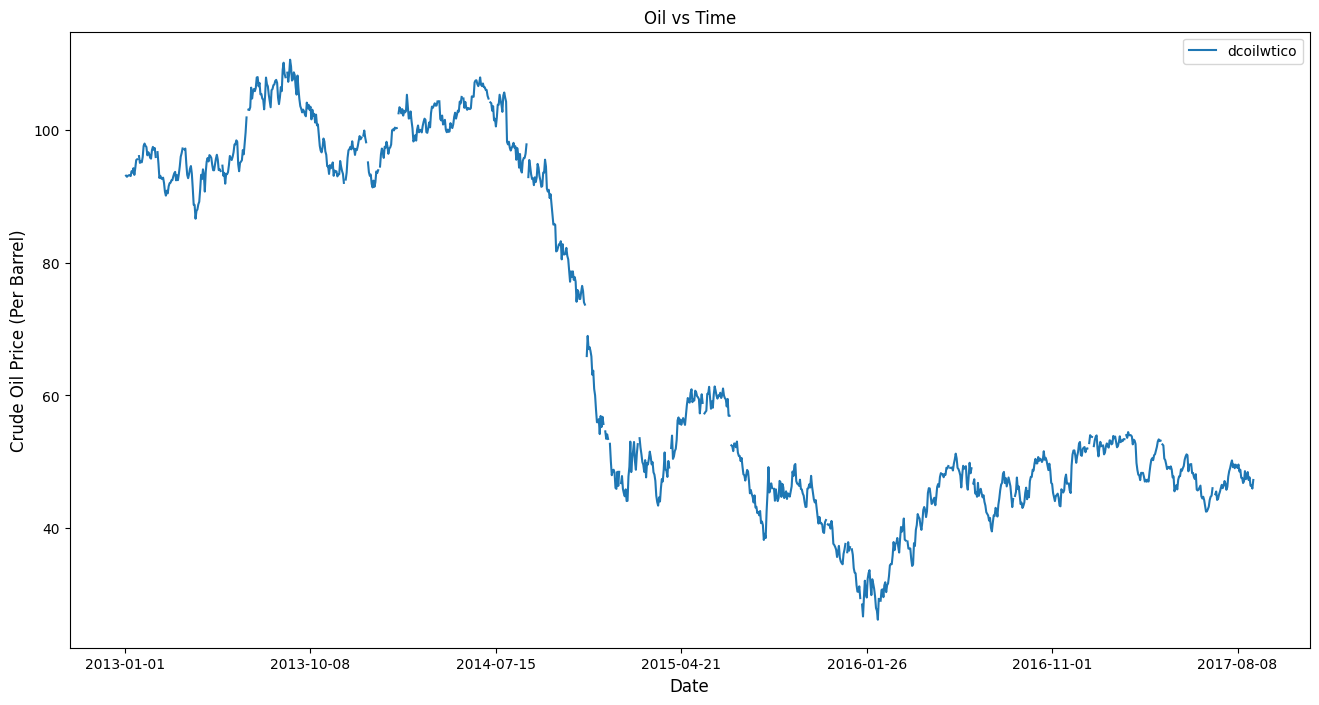

In [8]:
ax = oil.set_index('date').plot(figsize = (16, 8))
ax.set_title('Oil vs Time')
ax.set_xlabel('Date', fontsize = 'large')
ax.set_ylabel("Crude Oil Price (Per Barrel)", fontsize = 'large')

Text(0, 0.5, 'Sales')

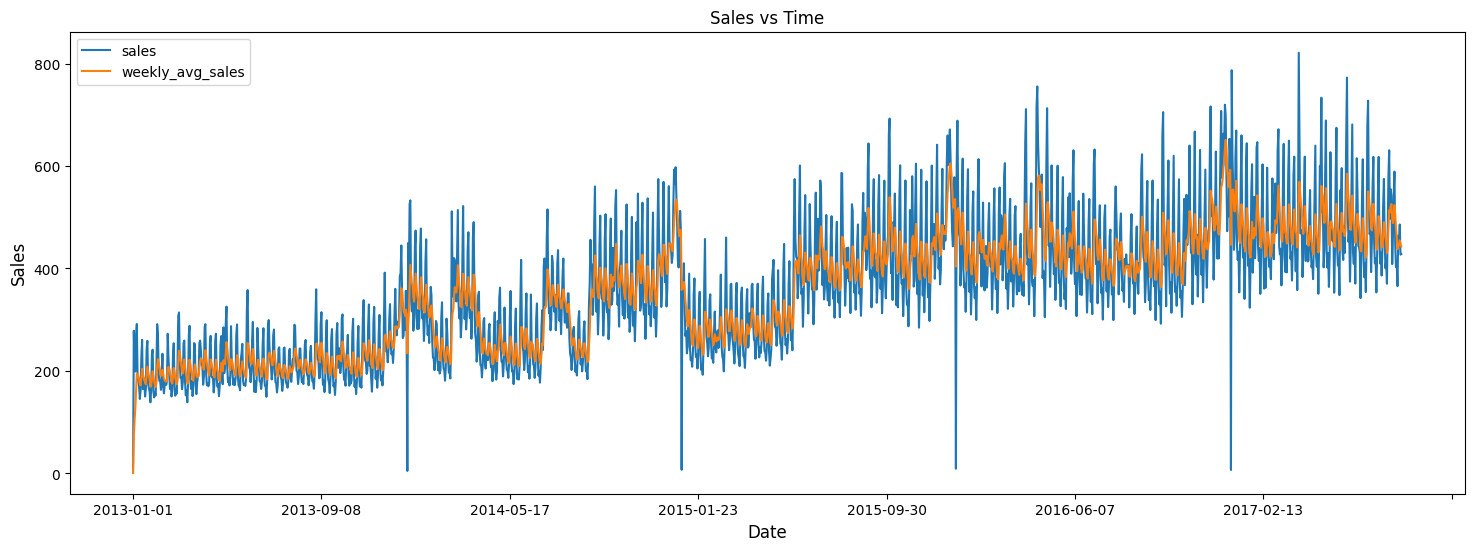

In [9]:
avg_sales = train.groupby('date').agg({'sales': 'mean'}).reset_index()
avg_sales['weekly_avg_sales'] = avg_sales['sales'].ewm(span=7, adjust=False).mean()
ax1 = avg_sales.plot(x= 'date', y= ['sales', 'weekly_avg_sales'], figsize=(18,6))
ax1.set_title("Sales vs Time")
ax1.set_xlabel('Date', fontsize = 'large')
ax1.set_ylabel("Sales", fontsize = 'large')

Text(0, 0.5, 'Sales')

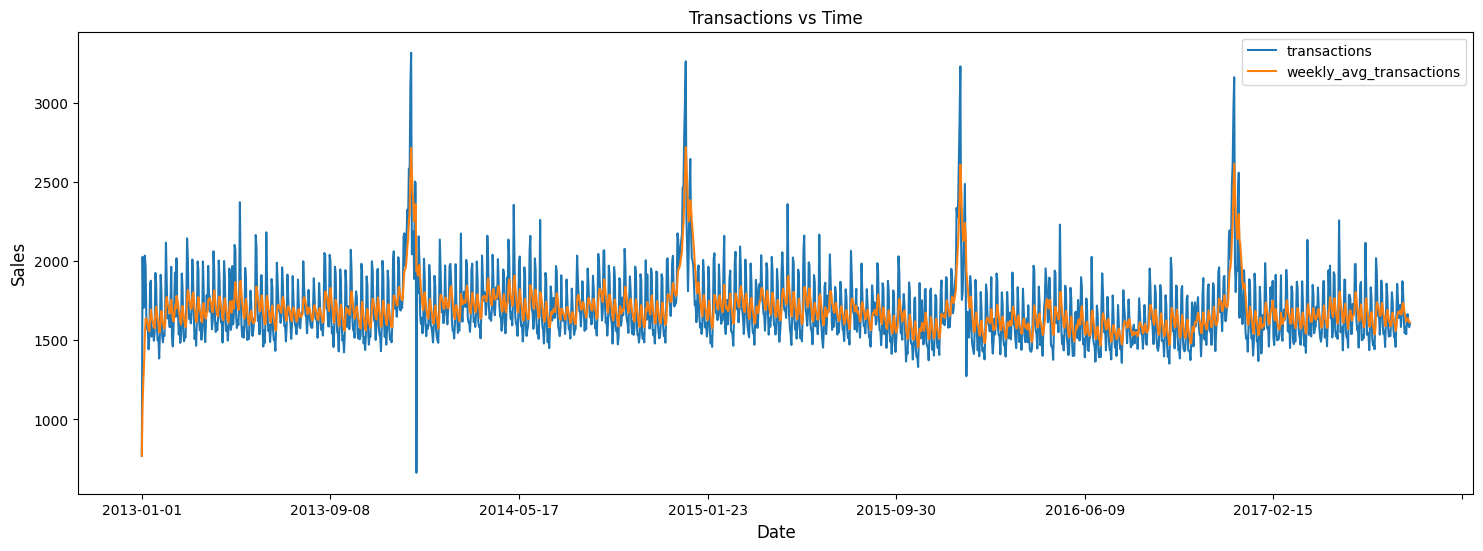

In [10]:
avg_transactions = trans.groupby('date').agg({'transactions': 'mean'}).reset_index()
avg_transactions['weekly_avg_transactions'] = avg_transactions['transactions'].ewm(span=7, adjust=False).mean()
ax2 = avg_transactions.plot(x= 'date', y= ['transactions', 'weekly_avg_transactions'], figsize=(18,6))
ax2.set_title("Transactions vs Time")
ax2.set_xlabel('Date', fontsize = 'large')
ax2.set_ylabel("Sales", fontsize = 'large')

In [11]:
avg_transactions

,date,transactions,weekly_avg_transactions
0,2013-01-01,770.000000,770.000000
1,2013-01-02,2026.413043,1084.103261
2,2013-01-03,1706.608696,1239.729620
3,2013-01-04,1706.391304,1356.395041
4,2013-01-05,2034.195652,1525.845194
...,...,...,...
1677,2017-08-11,1658.351852,1627.835029
1678,2017-08-12,1665.314815,1637.204975
1679,2017-08-13,1592.462963,1626.019472
1680,2017-08-14,1582.370370,1615.107197


In [12]:
avg_transactions['weekly_avg_transactions'] 

0        770.000000
1       1084.103261
2       1239.729620
3       1356.395041
4       1525.845194
           ...     
1677    1627.835029
1678    1637.204975
1679    1626.019472
1680    1615.107197
1681    1612.075768
Name: weekly_avg_transactions, Length: 1682, dtype: float64

In [13]:
oil['sales'] = avg_sales['sales']
oil['transactions'] = avg_transactions['transactions']
oil

,date,dcoilwtico,sales,transactions
0,2013-01-01,NaN,1.409438,770.000000
1,2013-01-02,93.14,278.390807,2026.413043
2,2013-01-03,92.97,202.840197,1706.608696
3,2013-01-04,93.12,198.911154,1706.391304
4,2013-01-07,93.20,267.873244,2034.195652
...,...,...,...,...
1213,2017-08-25,47.65,712.750397,1613.207547
1214,2017-08-28,46.40,546.568839,1626.547170
1215,2017-08-29,46.46,444.559792,1550.905660
1216,2017-08-30,45.96,448.178706,1719.981132


Text(0, 0.5, 'cost of Oil')

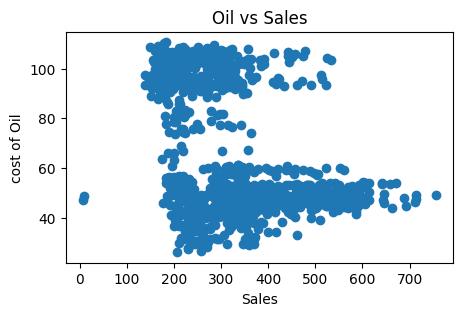

In [14]:
plt.figure(figsize=(5,3))
plt.scatter(oil['sales'],oil['dcoilwtico'])

plt.title("Oil vs Sales")
plt.xlabel('Sales') 
plt.ylabel('cost of Oil') 

Text(0, 0.5, 'cost of Oil')

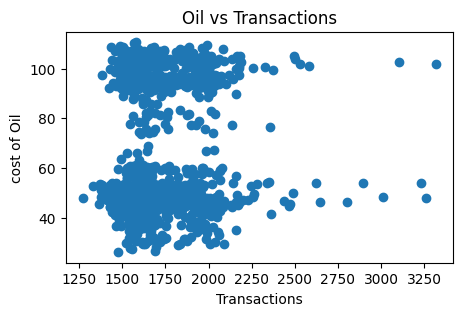

In [15]:
plt.figure(figsize=(5,3))
plt.scatter(oil['transactions'],oil['dcoilwtico'])

plt.title("Oil vs Transactions")
plt.xlabel('Transactions') 
plt.ylabel('cost of Oil') 

In [16]:
oil.corr()

/var/folders/gq/sl2mfvl90yqcl70f27h7dqcc0000gn/T/ipykernel_8648/3986899765.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  oil.corr()


,dcoilwtico,sales,transactions
dcoilwtico,1.000000,-0.500805,0.04319
sales,-0.500805,1.000000,0.37651
transactions,0.043190,0.376510,1.00000


In [17]:
train.family.unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [18]:
train['family'] = train['family'].astype('category')
print(train)
train['family_category'] = train['family'].cat.codes
#encode into numbers
train

              id        date  store_nbr                      family     sales  \
0              0  2013-01-01          1                  AUTOMOTIVE     0.000   
1              1  2013-01-01          1                   BABY CARE     0.000   
2              2  2013-01-01          1                      BEAUTY     0.000   
3              3  2013-01-01          1                   BEVERAGES     0.000   
4              4  2013-01-01          1                       BOOKS     0.000   
...          ...         ...        ...                         ...       ...   
3000883  3000883  2017-08-15          9                     POULTRY   438.133   
3000884  3000884  2017-08-15          9              PREPARED FOODS   154.553   
3000885  3000885  2017-08-15          9                     PRODUCE  2419.729   
3000886  3000886  2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887  3000887  2017-08-15          9                     SEAFOOD    16.000   

         onpromotion  
0   

,id,date,store_nbr,family,sales,onpromotion,family_category
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,0
1,1,2013-01-01,1,BABY CARE,0.000,0,1
2,2,2013-01-01,1,BEAUTY,0.000,0,2
3,3,2013-01-01,1,BEVERAGES,0.000,0,3
4,4,2013-01-01,1,BOOKS,0.000,0,4
...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,28
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,29
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,30
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,31


In [19]:
family_category = dict( zip( train['family'].cat.codes, train['family'] ) )
family_category

{0: 'AUTOMOTIVE',
 1: 'BABY CARE',
 2: 'BEAUTY',
 3: 'BEVERAGES',
 4: 'BOOKS',
 5: 'BREAD/BAKERY',
 6: 'CELEBRATION',
 7: 'CLEANING',
 8: 'DAIRY',
 9: 'DELI',
 10: 'EGGS',
 11: 'FROZEN FOODS',
 12: 'GROCERY I',
 13: 'GROCERY II',
 14: 'HARDWARE',
 15: 'HOME AND KITCHEN I',
 16: 'HOME AND KITCHEN II',
 17: 'HOME APPLIANCES',
 18: 'HOME CARE',
 19: 'LADIESWEAR',
 20: 'LAWN AND GARDEN',
 21: 'LINGERIE',
 22: 'LIQUOR,WINE,BEER',
 23: 'MAGAZINES',
 24: 'MEATS',
 25: 'PERSONAL CARE',
 26: 'PET SUPPLIES',
 27: 'PLAYERS AND ELECTRONICS',
 28: 'POULTRY',
 29: 'PREPARED FOODS',
 30: 'PRODUCE',
 31: 'SCHOOL AND OFFICE SUPPLIES',
 32: 'SEAFOOD'}

/var/folders/gq/sl2mfvl90yqcl70f27h7dqcc0000gn/T/ipykernel_8648/3978144967.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped_family_types = train.groupby(['family_category']).mean()[['sales', 'onpromotion']]


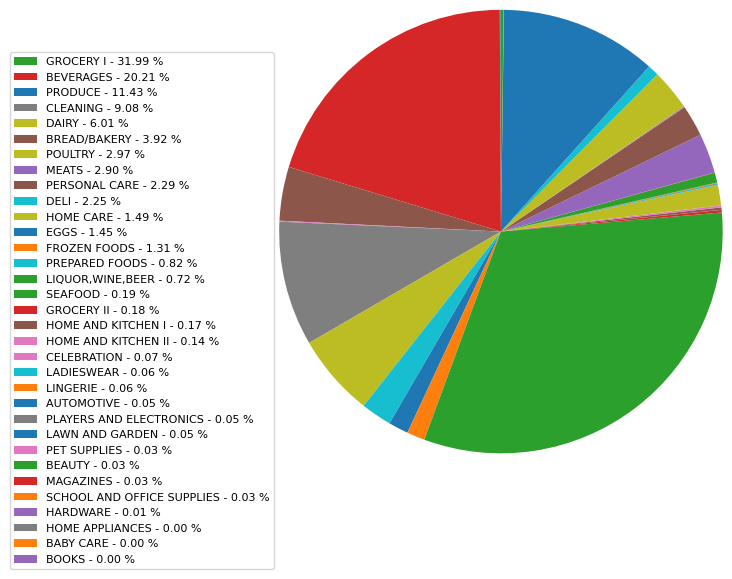

In [34]:
data_grouped_family_types = train.groupby(['family_category']).mean()[['sales', 'onpromotion']]


data_grouped_family_types['%_s'] = 100 * data_grouped_family_types['sales'] / data_grouped_family_types['sales'].sum()
data_grouped_family_types['%_s'] = data_grouped_family_types['%_s'].round(decimals = 3)


percent = 100 * data_grouped_family_types['sales'] / data_grouped_family_types['sales'].sum()
percent = percent.round(decimals = 3)
patches, texts = plt.pie(data_grouped_family_types['%_s'], startangle=90, radius=1.5)


lables_2 = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(family_category.values(), percent)]


sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, lables_2, data_grouped_family_types['%_s']),
                                          key=lambda x: x[2],
                                          reverse=True))
    
plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)


              id       date  store_nbr                      family   sales  \
2216622  2216622 2016-05-31         53                   GROCERY I  7517.0   
2200584  2200584 2016-05-22         53                   GROCERY I  6044.0   
2211276  2211276 2016-05-28         53                   GROCERY I  5846.0   
2188110  2188110 2016-05-15         53                   GROCERY I  6154.0   
2213058  2213058 2016-05-29         53                   GROCERY I  6681.0   
...          ...        ...        ...                         ...     ...   
969637    969637 2014-06-30         15  SCHOOL AND OFFICE SUPPLIES     0.0   
969638    969638 2014-06-30         15                     SEAFOOD    17.0   
969640    969640 2014-06-30         16                   BABY CARE     0.0   
969641    969641 2014-06-30         16                      BEAUTY     0.0   
3000887  3000887 2017-08-15          9                     SEAFOOD    16.0   

         onpromotion  family_category  day_of_week  month  year

/var/folders/gq/sl2mfvl90yqcl70f27h7dqcc0000gn/T/ipykernel_8648/1089057875.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  b=train.groupby(['family']).mean()['onpromotion']


<AxesSubplot: title={'center': 'Items promoted by category'}, xlabel='family'>

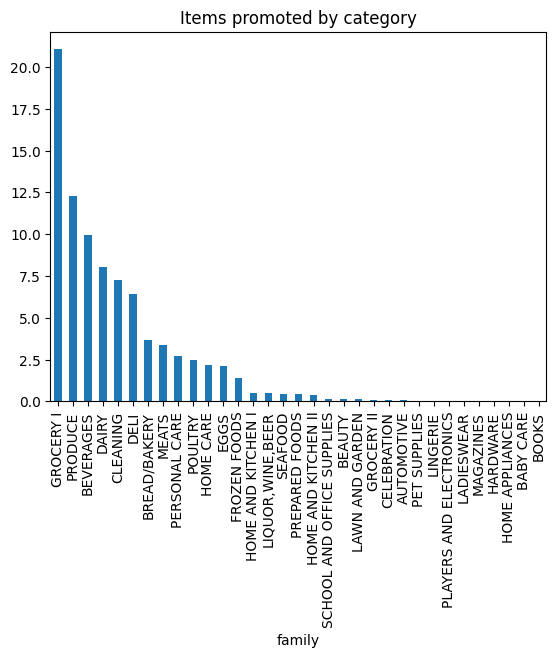

In [31]:
# testgroup = train.sort_values('onpromotion').groupby(['family']).mean()['onpromotion']
# testgroup = train.sort_values(by='onpromotion')
a=train.sort_values(by='onpromotion',ascending=False)
print(a)
b=train.groupby(['family']).mean()['onpromotion']
# testgroup.sort_values(ascending=False)
# testgroup.plot(kind='bar', stacked=True, sort_columns= True)
# data_grouped_family_types['%_p'].plot(kind='bar', stacked=True)
# print(testgroup)
d=b.sort_values(ascending=False)
print(d)
d.plot(kind='bar', stacked=True, x="family_category",title="Items promoted by category")

/var/folders/gq/sl2mfvl90yqcl70f27h7dqcc0000gn/T/ipykernel_8648/1801414516.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  testgroup = train.groupby(['family']).mean()['sales']


<AxesSubplot: title={'center': 'Sales by category'}, xlabel='family'>

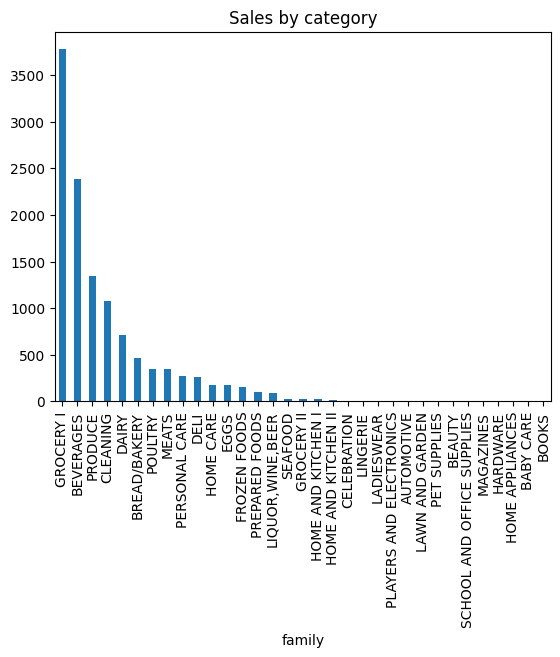

In [23]:
testgroup = train.groupby(['family']).mean()['sales']
z = testgroup.sort_values(ascending=False)
z.plot(kind='bar', stacked=True, x="family_category",title="Sales by category")

              id       date  store_nbr                      family     sales  \
0              0 2013-01-01          1                  AUTOMOTIVE     0.000   
1              1 2013-01-01          1                   BABY CARE     0.000   
2              2 2013-01-01          1                      BEAUTY     0.000   
3              3 2013-01-01          1                   BEVERAGES     0.000   
4              4 2013-01-01          1                       BOOKS     0.000   
...          ...        ...        ...                         ...       ...   
3000883  3000883 2017-08-15          9                     POULTRY   438.133   
3000884  3000884 2017-08-15          9              PREPARED FOODS   154.553   
3000885  3000885 2017-08-15          9                     PRODUCE  2419.729   
3000886  3000886 2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887  3000887 2017-08-15          9                     SEAFOOD    16.000   

         onpromotion  family_category  

/var/folders/gq/sl2mfvl90yqcl70f27h7dqcc0000gn/T/ipykernel_8648/3685858649.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped_day = train.groupby(['day_of_week']).mean()['sales']
/var/folders/gq/sl2mfvl90yqcl70f27h7dqcc0000gn/T/ipykernel_8648/3685858649.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped_month = train.groupby(['month']).mean()['sales']
/var/folders/gq/sl2mfvl90yqcl70f27h7dqcc0000gn/T/ipykernel_8648/3685858649.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Eithe

<AxesSubplot: title={'center': 'sales by day of the week'}, xlabel='day_of_week'>

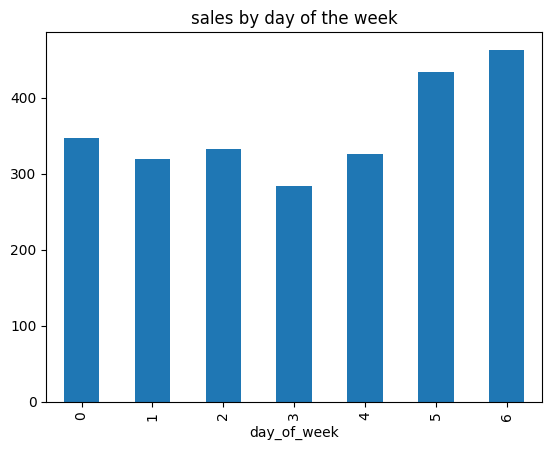

In [40]:
#dates
train['date'] = pd.to_datetime(train['date'])
train['day_of_week'] = train['date'].dt.dayofweek
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year
print(train)
data_grouped_day = train.groupby(['day_of_week']).mean()['sales']
data_grouped_month = train.groupby(['month']).mean()['sales']
data_grouped_year = train.groupby(['year']).mean()['sales']
plt.title('sales by day of the week')
data_grouped_day.plot(kind='bar', stacked=True)

<AxesSubplot: title={'center': 'sales by month'}, xlabel='month'>

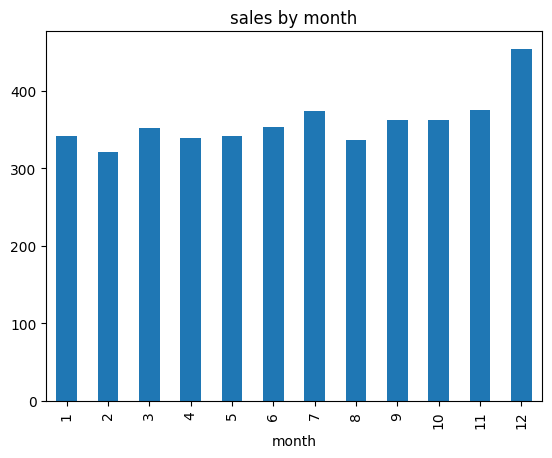

In [39]:
plt.title('sales by month')
data_grouped_month.plot(kind='bar', stacked=True)

<AxesSubplot: title={'center': 'sales by year'}, xlabel='year'>

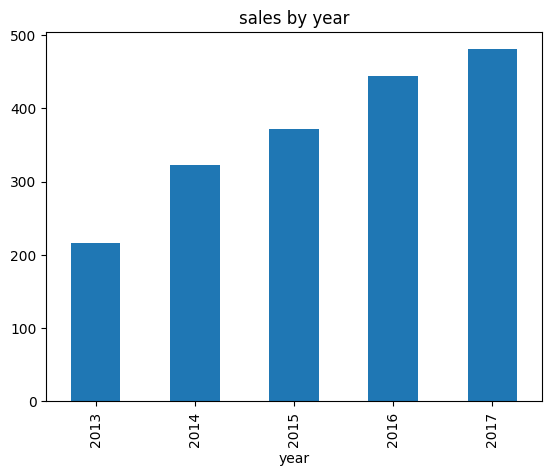

In [41]:
plt.title('sales by year')
data_grouped_year.plot(kind='bar', stacked=True)


In [37]:
data_grouped_year

year
2013    216.479530
2014    322.939786
2015    371.357193
2016    443.790297
2017    480.124466
Name: sales, dtype: float64

['Holiday' 'Transfer' 'Additional' 'Bridge' 'Work Day' 'Event']
Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: type, dtype: int64
        date      type       sales
0 2013-01-01   Holiday    1.409438
1 2013-01-05  Work Day  267.873244
2 2013-01-12  Work Day  226.295293
3 2013-02-11   Holiday  156.356672
4 2013-02-12   Holiday  173.288884
type
Additional    479.495101
Bridge        446.750854
Event         425.660065
Holiday       367.947786
Transfer      460.521796
Name: sales, dtype: float64
type
Holiday       367.947786
Work Day      372.157524
Event         425.660065
Bridge        446.750854
Transfer      460.521796
Additional    479.495101
Name: sales, dtype: float64
average holiday sales is 425.4221877399928


/var/folders/gq/sl2mfvl90yqcl70f27h7dqcc0000gn/T/ipykernel_8648/2754990306.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_type['date'] = pd.to_datetime(day_type['date'])
/var/folders/gq/sl2mfvl90yqcl70f27h7dqcc0000gn/T/ipykernel_8648/2754990306.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_1 = df.groupby(['type']).mean()['sales']


Text(0.5, 1.0, 'average holiday sales')

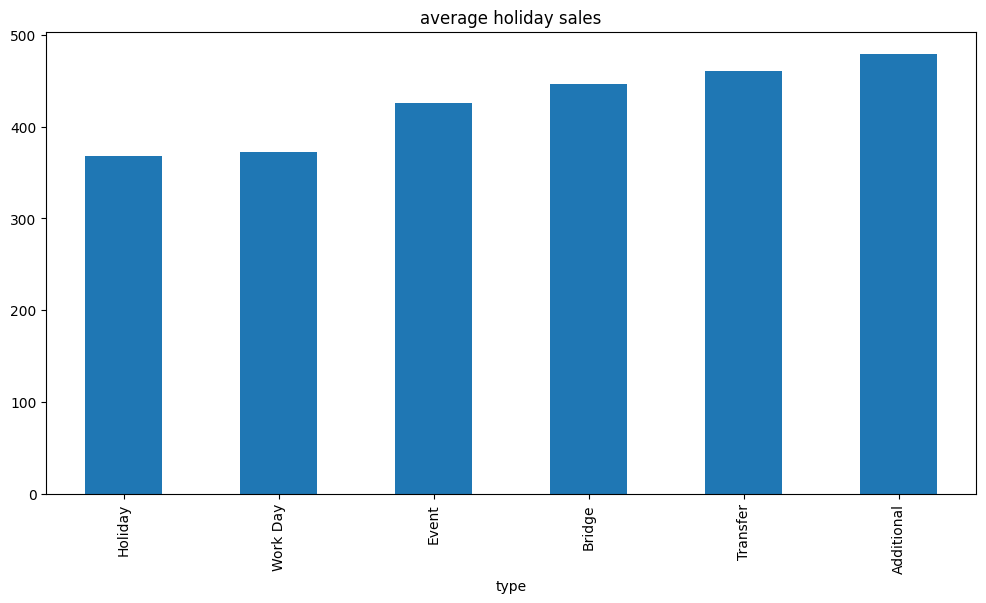

In [44]:
print(holiday['type'].unique())
print(holiday['type'].value_counts())

day_type = holiday[['date', 'type']]
avg_sales = train.groupby('date').agg({'sales': 'mean'}).reset_index()

day_type['date'] = pd.to_datetime(day_type['date'])
avg_sales['date'] = pd.to_datetime(avg_sales['date'])

#print(day_type.head())
#print(avg_sales.head())

df = pd.merge_asof(day_type, avg_sales, on = 'date')
df.dropna(inplace= True)
df.reset_index(drop = True, inplace= True)

print(df.head())

df_1 = df.groupby(['type']).mean()['sales']
average_holiday_sales = df_1.mean()
print(df_1.head())
a=df_1.sort_values()
print(a)
print(f'average holiday sales is {average_holiday_sales}')

a.plot(kind='bar', figsize = (12,6)).set_title('average holiday sales')

Text(0.5, 1.0, 'Sales Ranking by Store')

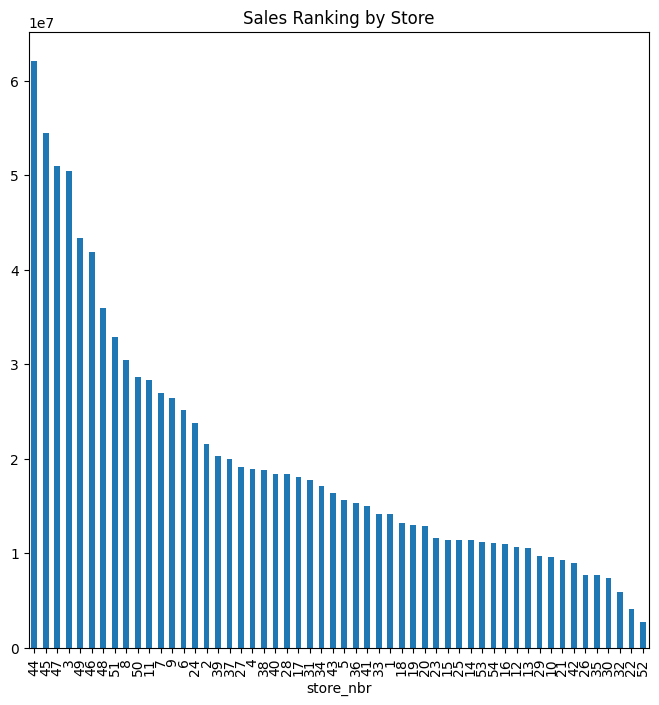

In [45]:
plt.figure(figsize=(8,8))
train.groupby('store_nbr').sales.sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Sales Ranking by Store')

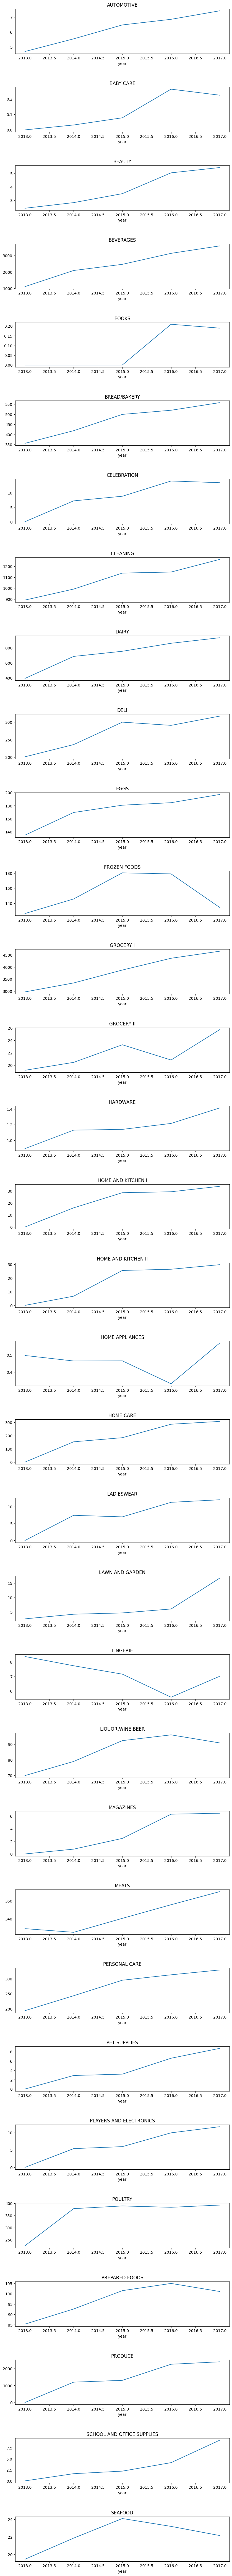

In [47]:
fig= plt.figure(figsize=(10,120))
fig.subplots_adjust(hspace=0.75)
for i,product in enumerate(train.family.unique()):
    ax = fig.add_subplot(33,1,i+1)
    train.query('family==@product').groupby(['year']).sales.mean().plot()
    plt.title(product);

In [48]:
holiday

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False
